In [27]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from time import time
plt.rcParams['figure.figsize'] = 16, 5

In [28]:
iterations = int(1e2)
n = int(1e5)

In [29]:
def random_sample(i, n):
    local_state = np.random.RandomState(seed=i)
    x = 1-2. * local_state.uniform(0, 1.001, n)
    y = 1-2. * local_state.uniform(0, 1.001, n)
    return 4*sum(x*x+y*y<=1)/n

In [30]:
T10 = time()
sim_logger = Parallel(n_jobs=-1)(delayed(random_sample)(i, n) for i in range(iterations))
print('Simulation time:', round(time()-T10, 3), 's')

Simulation time: 22.685 s


In [24]:
sim_graph = np.cumsum(np.array(sim_logger))/range(1, len(sim_logger)+1)
print('\n'.join(['Value of PI after iteration '+str(i+1)+': '+str(p) for i, p in enumerate(sim_graph)]))

Value of PI after iteration 1: 3.12428
Value of PI after iteration 2: 3.12896
Value of PI after iteration 3: 3.1278666666666672
Value of PI after iteration 4: 3.1291200000000003
Value of PI after iteration 5: 3.1291840000000004
Value of PI after iteration 6: 3.13036
Value of PI after iteration 7: 3.131108571428572
Value of PI after iteration 8: 3.132035
Value of PI after iteration 9: 3.132737777777778
Value of PI after iteration 10: 3.133912
Value of PI after iteration 11: 3.1331127272727275
Value of PI after iteration 12: 3.133036666666667
Value of PI after iteration 13: 3.1334
Value of PI after iteration 14: 3.134077142857143
Value of PI after iteration 15: 3.134053333333333
Value of PI after iteration 16: 3.1340774999999996
Value of PI after iteration 17: 3.1344211764705876
Value of PI after iteration 18: 3.1348711111111105
Value of PI after iteration 19: 3.134987368421052
Value of PI after iteration 20: 3.1346439999999993
Value of PI after iteration 21: 3.1347199999999993
Value of 

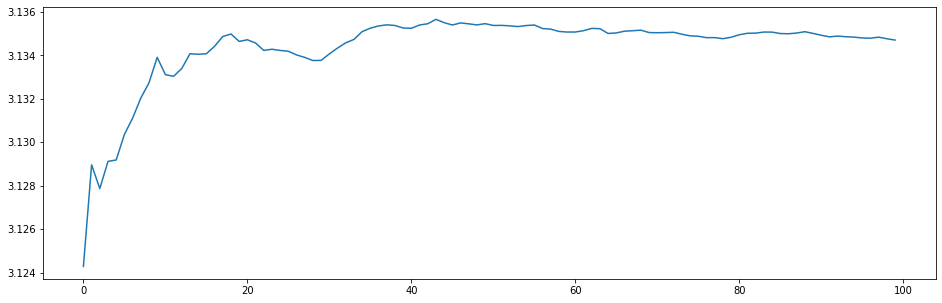

In [25]:
plt.figure()
plt.plot(np.cumsum(np.array(sim_logger))/range(1, len(sim_logger)+1))
plt.show()

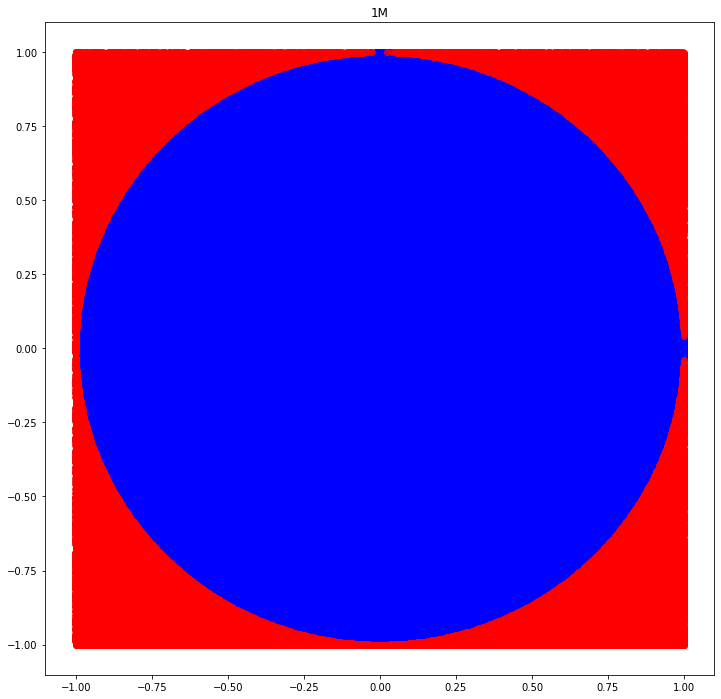

In [4]:
fig, ax = plt.subplots(1, sharex=True, sharey=True)
plt.scatter(inside_X, inside_Y, c='b', alpha=0.8, axes=ax)
plt.scatter(outside_X, outside_Y, c='r', alpha=0.8, axes=ax)
plt.title('1M')
plt.show()

In [5]:
fig.savefig('pi.png')